Aim --> To solve classification problem

For example:

Will a student pass or fail?

Is an email spam or not?

Does a patient have a disease or not?

Despite the name, it is used for classification, not regression.

Step 1: Make a Linear Prediction
Like in Linear Regression, we calculate a value z using the formula:

𝑧
=
𝑤
1
𝑥
1
+
𝑤
2
𝑥
2
+
⋯
+
𝑤
𝑛
𝑥
𝑛
+
𝑏

- x₁, x₂, ..., xₙ are the input features

- w₁, w₂, ..., wₙ are the weights

- b is the bias

- z is the linear combination of inputs

Step 2: Apply the Sigmoid Function
To convert z into a probability (between 0 and 1), we use the sigmoid function:

σ(z)= 1/(1+e^-z)
​

This converts the output to a number between 0 and 1.

If the output is close to 1 → predict class 1 (e.g., "Yes").

If the output is close to 0 → predict class 0 (e.g., "No").

We usually use a 0.5 threshold.

Dataset --> 2 features

| No. of Play Hours | Result |
|-------------------|--------|
| 9                 | Fail   |
| 8                 | Fail   |
| 7                 | Fail   |
| 6                 | Fail   |
| 5                 | Pass   |
| 4                 | Pass   |
| 1                 | Pass   |
| 2                 | Fail   |

Two types of classification
- Binary Classification
- Multiclass Classification

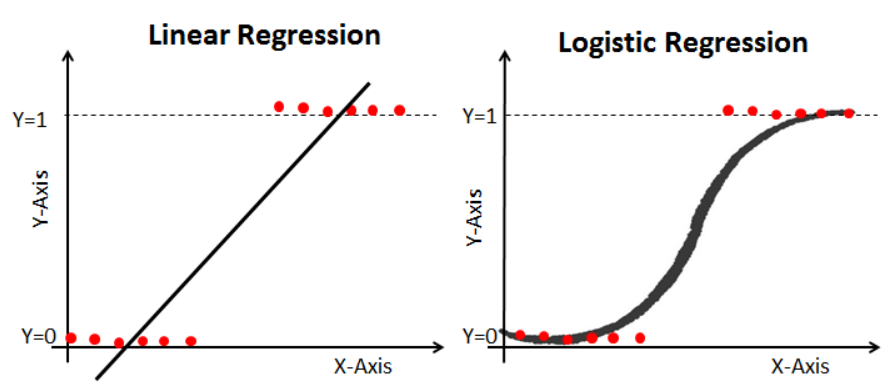

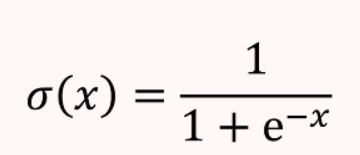

Class prediction is based on threshold:

If

σ(z)≥0.5, predict class 1

Else, predict class 0

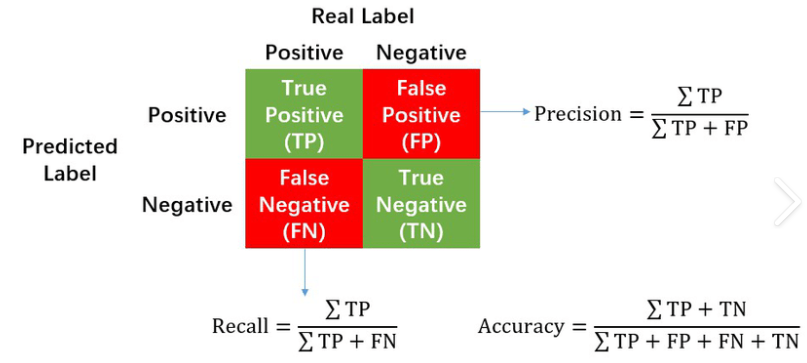

If there is imbalanced dataset we don't we accuracy we use precision and recall.

False Positive is important in precision and False Negative is important in recall.

Spam Classification
- Mail is spam and model predicted as spam --> Good scenario
- Mail is not spam but model predicts spam. Important mail may be missed. (Blunder). In this scenario false positive is important. So we must reduce it. Hence we use precision.
- Mail is spam , model predicts not a spam. (Not much effect)

Diabetes Prediction
- Person suffered from diabetes and model also predicts suffering from diabetes. --> Good scenario
- Person suffered from diabetes but model predicts not suffering from diabetes. --> Blunder. False negative should be reduced. Hence we use recall.
- Actually personal has no diabetes but model predicts suffering from diabetes. (Not much effect)

Hyperparameter Tuning --> Find the best parameters while training the model
- GridSearchCV
- RandomizedSearchCV

Disadvantage:
- Time complexity increases for training the model.

RandomizedSearchCV --> Time Complexity Decrease

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
dataset = load_iris()

In [ ]:
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
df = pd.DataFrame(dataset.data,columns = dataset.feature_names)

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target']

KeyError: 'target'

In [ ]:
df['target'] = dataset.target

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df['target'].value_counts()

,count
target,
0,50
1,50
2,50


In [ ]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Binary Classification

In [ ]:
df['target'] != 2

,target
0,True
1,True
2,True
3,True
4,True
...,...
145,False
146,False
147,False
148,False


In [ ]:
df_copy = df[df['target'] != 2]

In [ ]:
df_copy.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df_copy.shape

(100, 5)

In [ ]:
df_copy['target'].value_counts()

,count
target,
0,50
1,50


In [ ]:
df_copy.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1
99,5.7,2.8,4.1,1.3,1


In [ ]:
df_copy.target

,target
0,0
1,0
2,0
3,0
4,0
...,...
95,1
96,1
97,1
98,1


In [ ]:
df_copy.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df_copy['target'].unique()

array([0, 1])

In [ ]:
df_copy['target'].value_counts()

,count
target,
0,50
1,50


In [ ]:
df_copy

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


Independent and Dependent Features

In [ ]:
X = df_copy.iloc[:,:-1]
y = df_copy.iloc[:,-1]

In [ ]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1


In [ ]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
95,1
96,1
97,1
98,1


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
## train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 121)

In [ ]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
53,5.5,2.3,4.0,1.3
76,6.8,2.8,4.8,1.4
48,5.3,3.7,1.5,0.2
5,5.4,3.9,1.7,0.4
59,5.2,2.7,3.9,1.4
...,...,...,...,...
65,6.7,3.1,4.4,1.4
95,5.7,3.0,4.2,1.2
8,4.4,2.9,1.4,0.2
85,6.0,3.4,4.5,1.6


In [ ]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
82,5.8,2.7,3.9,1.2
38,4.4,3.0,1.3,0.2
23,5.1,3.3,1.7,0.5
98,5.1,2.5,3.0,1.1
18,5.7,3.8,1.7,0.3
22,4.6,3.6,1.0,0.2
20,5.4,3.4,1.7,0.2
15,5.7,4.4,1.5,0.4
97,6.2,2.9,4.3,1.3
29,4.7,3.2,1.6,0.2


In [ ]:
y_train

,target
53,1
76,1
48,0
5,0
59,1
...,...
65,1
95,1
8,0
85,1


In [ ]:
y_test

,target
82,1
38,0
23,0
98,1
18,0
22,0
20,0
15,0
97,1
29,0


In [ ]:
classifier = LogisticRegression()

In [ ]:
classifier

LogisticRegression()

In [ ]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [ ]:
## Prediction
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1])

In [ ]:
list(y_test)

[1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1]

In [ ]:
classifier.predict_proba(X_test)

array([[0.03278461, 0.96721539],
       [0.97553608, 0.02446392],
       [0.92615997, 0.07384003],
       [0.21919524, 0.78080476],
       [0.94306035, 0.05693965],
       [0.99071675, 0.00928325],
       [0.93827705, 0.06172295],
       [0.9729971 , 0.0270029 ],
       [0.01305752, 0.98694248],
       [0.95597937, 0.04402063],
       [0.92813985, 0.07186015],
       [0.97350752, 0.02649248],
       [0.0686867 , 0.9313133 ],
       [0.94297103, 0.05702897],
       [0.92786398, 0.07213602],
       [0.94957608, 0.05042392],
       [0.03964232, 0.96035768],
       [0.0249099 , 0.9750901 ],
       [0.97852632, 0.02147368],
       [0.97880246, 0.02119754],
       [0.97631447, 0.02368553],
       [0.00467597, 0.99532403],
       [0.96018007, 0.03981993],
       [0.9450928 , 0.0549072 ],
       [0.97177751, 0.02822249],
       [0.96874356, 0.03125644],
       [0.02709121, 0.97290879],
       [0.95152867, 0.04847133],
       [0.96434738, 0.03565262],
       [0.96906398, 0.03093602],
       [0.

Confusion matrix, accuracy score, classification report

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[22  0]
 [ 0 11]]


In [ ]:
print(accuracy_score(y_test, y_pred))

1.0


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        11

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



Hyperparameter Tuning

In [ ]:
## GridSearchCV
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
parameters = {
              'penalty' : ['l1','l2','elasticnet',None],
              'dual' : [True, False],
              'C' : [1,10,20,30,40,50],
              'max_iter' : [100, 200, 300, 1000, 10000]
              }

In [ ]:
clf = GridSearchCV(classifier, param_grid = parameters)

In [ ]:
clf

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 20, 30, 40, 50], 'dual': [True, False],
                         'max_iter': [100, 200, 300, 1000, 10000],
                         'penalty': ['l1', 'l2', 'elasticnet', None]})

In [ ]:
## Splitting of train data to validation data
clf.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 20, 30, 40, 50], 'dual': [True, False],
                         'max_iter': [100, 200, 300, 1000, 10000],
                         'penalty': ['l1', 'l2', 'elasticnet', None]})

In [ ]:
clf.best_params_

{'C': 1, 'dual': False, 'max_iter': 100, 'penalty': 'l2'}

In [ ]:
classifier = LogisticRegression(C = 1, penalty = 'l2',max_iter = 100, dual=False)

In [ ]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1)

In [ ]:
## Prediction
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

[[22  0]
 [ 0 11]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        11

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



In [ ]:
## Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_clf = RandomizedSearchCV(LogisticRegression(), param_distributions=parameters)

In [ ]:
random_clf.fit(X_train,y_train)

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [1, 10, 20, 30, 40, 50],
                                        'dual': [True, False],
                                        'max_iter': [100, 200, 300, 1000,
                                                     10000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None]})

In [ ]:
random_clf.best_params_

{'penalty': 'l2', 'max_iter': 1000, 'dual': False, 'C': 20}

In [ ]:
classifier = LogisticRegression(C = 20, penalty = 'l2' , max_iter = 1000)

In [ ]:
classifier

LogisticRegression(C=20, max_iter=1000)

In [ ]:
classifier.fit(X_train, y_train)

LogisticRegression(C=20, max_iter=1000)

In [ ]:
## Prediction
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[22  0]
 [ 0 11]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        11

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



In [ ]:
# Import pickle for saving and loading the model
import pickle

# Filepath for saving the model
pickle_file = 'logistic.pkl'

# Save the trained model to a pickle file
with open(pickle_file, 'wb') as file:
    pickle.dump(classifier, file)

print(f'Model saved to {pickle_file}')

Model saved to logistic.pkl


In [ ]:
# Load the model from the pickle file
with open(pickle_file, 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
# Test the loaded model with predictions
y_pred_loaded = loaded_model.predict(X_test)
print(y_pred_loaded)

[1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1]


In [ ]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [ ]:
loaded_model.predict([[5.1,3.5,1.4,0.2]])

array([0])

In [ ]:
loaded_model.predict([[3.5,4.2,5.5,6.3]])

array([1])